In [3]:
import pandas as pd

In [6]:
data = pd.read_csv('data/train.csv')

In [7]:
data

,ID,text,label
0,SUAVK39Z,I feel that it was better I dieAm happy,Depression
1,9JDAGUV3,Why do I get hallucinations?,Drugs
2,419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
3,6UY7DX6Q,Why is life important?,Suicide
4,FYC0FTFB,How could I be helped to go through the depres...,Depression
...,...,...,...
611,BOHSNXCN,What should I do to stop alcoholism?,Alcohol
612,GVDXRQPY,How to become my oldself again,Suicide
613,IO4JHIQS,How can someone stop it?,Alcohol
614,1DS3P1XO,I feel unworthy,Depression


In [11]:
import seaborn as sns

In [22]:
labels = pd.DataFrame(data['label'].value_counts())
labels['count'] = labels['label']
labels.label = labels.index
labels

,label,count
Depression,Depression,352
Alcohol,Alcohol,140
Suicide,Suicide,66
Drugs,Drugs,58


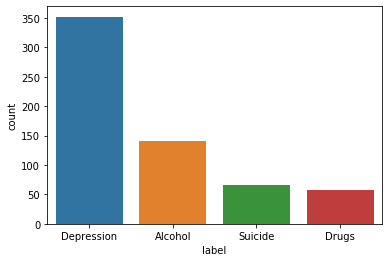

In [23]:
sns.barplot(x="label", y="count", data=labels)

In [32]:
labels['occupancy'] = labels['count']/labels['count'].sum()
labels

,label,count,occupancy
Depression,Depression,352,0.571429
Alcohol,Alcohol,140,0.227273
Suicide,Suicide,66,0.107143
Drugs,Drugs,58,0.094156


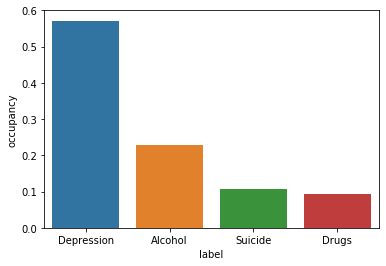

In [33]:
sns.barplot(x="label", y="occupancy", data=labels)

In [56]:
train = data[:400]
test = data[400:]

In [74]:
dep = train.loc[data['label'] == 'Depression']
alc = train.loc[data['label'] == 'Alcohol']
sui = train.loc[data['label'] == 'Suicide']
drug =train.loc[data['label'] == 'Drugs']

In [75]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.compose import ColumnTransformer

In [76]:
dep_corpus = CountVectorizer()
alc_corpus =  CountVectorizer()
sui_corpus =  CountVectorizer()
drug_corpus =  CountVectorizer()

In [77]:
a = dep_corpus.fit_transform(dep['text'])
b = alc_corpus.fit_transform(alc['text'])
c = alc_corpus.fit_transform(sui['text'])
d = alc_corpus.fit_transform(drug['text'])

In [79]:
ap = pd.DataFrame(a.toarray())
ap

,0,1,2,3,4,5,6,7,8,9,...,495,496,497,498,499,500,501,502,503,504
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
228,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
ap.columns = dep_corpus.get_feature_names()

In [90]:
column_list = list(ap)

In [91]:
ap["sum"] = ap[column_list].sum(axis=1)

In [92]:
ap

,abandoned,about,absent,academic,academics,affair,affected,after,against,alive,...,with,withdraw,withdrawn,without,world,worried,worth,would,you,sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9
228,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
229,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13


In [99]:
apd = pd.DataFrame([])
apd['df'] = ap[column_list].sum(axis=0)

In [100]:
apd

,df
abandoned,2
about,4
absent,1
academic,1
academics,1
...,...
world,8
worried,1
worth,1
would,1


In [102]:
import math

In [108]:
math.exp(-12)

6.14421235332821e-06